# Proyecto ds4a EDA

Read dataset of 10 years

In [31]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib            as mpl
import tarfile


import folium  
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

In [50]:
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = (15,6)
mpl.rc('axes', labelsize=18)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
plt.rc('figure', titlesize=18)
plt.style.use('seaborn-darkgrid')

In [33]:
import json
import requests
import os
import datetime

In [53]:
data_folder = '../data'
filename = os.path.join(data_folder, 'siniestros_bogota_historico.csv')

In [54]:
accidents_file = os.path.join(filename)
accidents = pd.read_csv(accidents_file,sep=',')
accidents.head(3)

X         Y  OBJECTID  FORMULARIO  CODIGO_ACCIDENTE  \
0 -74.039690  4.759877      1001   A00728405            360471   
1 -74.114296  4.615476      1002   A00408972            305838   
2 -74.105296  4.509792      1003  A000341903           4437952   

   ANO_OCURRENCIA_ACC          DIRECCION     GRAVEDAD CLASE_ACC  \
0                2010   AK 18A-CL 182 58   SOLO DANOS    CHOQUE   
1                2008         TR 49-3 02   SOLO DANOS    CHOQUE   
2                2016  CL 80A-KR 1 SE 02  CON HERIDOS    CHOQUE   

   LOCALIDAD_GEO      LOCALIDAD            FECHA_HORA_ACC         CIV  \
0        USAQUEN        USAQUEN  2010-05-25T20:10:00.000Z   1007130.0   
1  PUENTE ARANDA  PUENTE ARANDA  2008-09-30T07:00:00.000Z  16004607.0   
2           USME           USME  2016-02-27T16:20:00.000Z   5002841.0   

   PK_CALZADA  
0  91019224.0  
1    195361.0  
2    149316.0

In [36]:
col=accidents.columns
col

Index(['X', 'Y', 'OBJECTID', 'FORMULARIO', 'CODIGO_ACCIDENTE',
       'ANO_OCURRENCIA_ACC', 'DIRECCION', 'GRAVEDAD', 'CLASE_ACC',
       'LOCALIDAD_GEO', 'LOCALIDAD', 'FECHA_HORA_ACC', 'CIV', 'PK_CALZADA'],
      dtype='object')

In [37]:
accidents.shape

(405348, 14)

In [38]:
dc=pd.DataFrame([[column, accidents[column].nunique()] for column in col],columns =['columns','distinc_counts']).sort_values(by='distinc_counts').reset_index(drop=True)
dc

columns  distinc_counts
0             GRAVEDAD               3
1            CLASE_ACC               7
2   ANO_OCURRENCIA_ACC              13
3            LOCALIDAD              20
4        LOCALIDAD_GEO              21
5                  CIV           45524
6           PK_CALZADA           51251
7                    X          188105
8                    Y          188159
9            DIRECCION          197595
10      FECHA_HORA_ACC          312806
11            OBJECTID          405348
12          FORMULARIO          405348
13    CODIGO_ACCIDENTE          405348

In [39]:
pd.DataFrame(print(accidents['LOCALIDAD'].values))

['USAQUEN' 'PUENTE ARANDA' 'USME' ... 'PUENTE ARANDA' 'CIUDAD BOLIVAR'
 'TUNJUELITO']


Empty DataFrame
Columns: []
Index: []

In [13]:
accidents['LOCALIDAD_GEO'].values

array(['USAQUEN', 'PUENTE ARANDA', 'USME', ..., 'PUENTE ARANDA',
       'CIUDAD BOLIVAR', 'TUNJUELITO'], dtype=object)

Read dataset for 2017 and 2018

# Accidents by year 2007-2019

In [40]:
by_year=accidents['ANO_OCURRENCIA_ACC'].value_counts(sort=True).rename_axis('year').reset_index(name='counts').sort_values(by='year').reset_index(drop=True)
by_year

year  counts
0   2007   36514
1   2008   35189
2   2009   26446
3   2010   28977
4   2011   29054
5   2012   29700
6   2013   29716
7   2014   28868
8   2015   30429
9   2016   33992
10  2017   34142
11  2018   33201
12  2019   29120

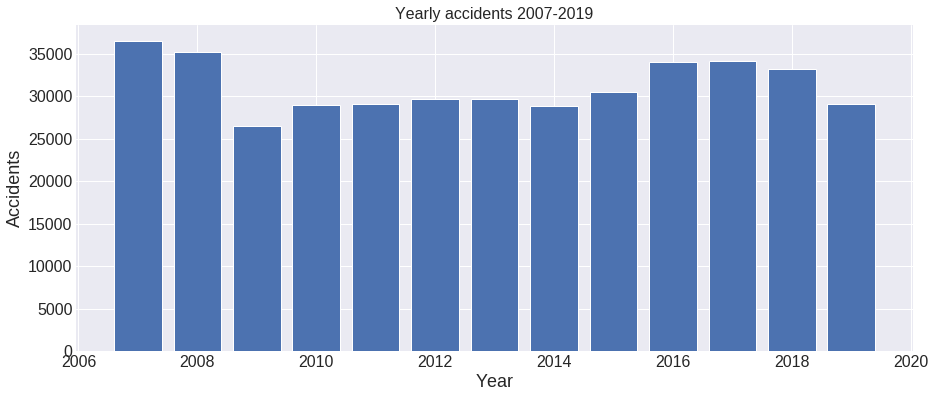

In [52]:
fig, ax = plt.subplots()
ax.bar(by_year['year'], by_year['counts'])
plt.title('Yearly accidents 2007-2019', fontsize =16)
plt.xlabel('Year');
plt.ylabel('Accidents');

# Accidents by hour 2007-2019

In [16]:
### change format for timestamp
accidents['FECHA_HORA_ACC']=pd.to_datetime(accidents['FECHA_HORA_ACC'])
### select hour for accident
accidents['hour_ACC']=accidents['FECHA_HORA_ACC'].apply(lambda x: x.hour)
by_hour=accidents['hour_ACC'].value_counts(sort=True).rename_axis('hour').reset_index(name='counts').sort_values(by='hour').reset_index(drop=True)
by_hour

hour  counts
0      0    4772
1      1    4035
2      2    3578
3      3    4164
4      4    4620
5      5   10646
6      6   19220
7      7   24824
8      8   22993
9      9   20269
10    10   21895
11    11   23485
12    12   24132
13    13   24985
14    14   26155
15    15   24687
16    16   23718
17    17   22898
18    18   20668
19    19   21977
20    20   19365
21    21   14019
22    22   11017
23    23    7226

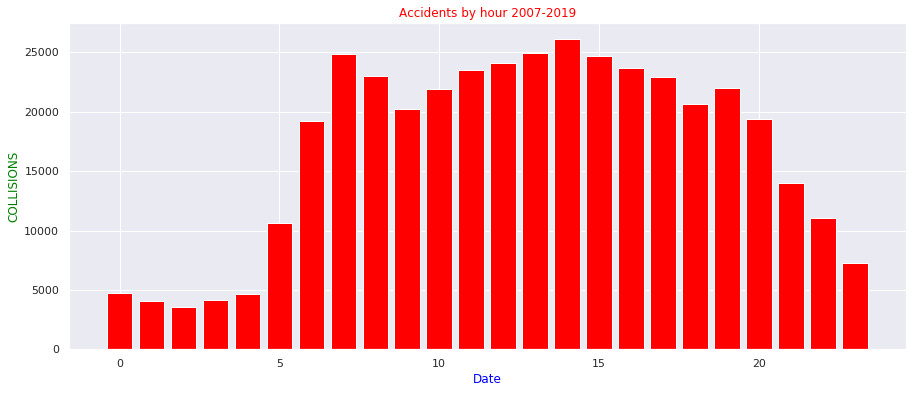

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(by_hour['hour'], by_hour['counts'],color='red')
plt.title('Accidents by hour 2007-2019', color="red")
plt.xlabel('Date',color="blue");
plt.ylabel('COLLISIONS',color="green");

# Accidents by month 2007-2019

In [19]:
accidents['MONTH_ACC']=accidents['FECHA_HORA_ACC'].apply(lambda x: x.month)
by_month=accidents['MONTH_ACC'].value_counts(sort=True).rename_axis('month').reset_index(name='counts').sort_values(by='month').reset_index(drop=True)
by_month

month  counts
0       1   28602
1       2   32963
2       3   35533
3       4   33444
4       5   36084
5       6   32707
6       7   33434
7       8   34670
8       9   34596
9      10   35204
10     11   34135
11     12   33976

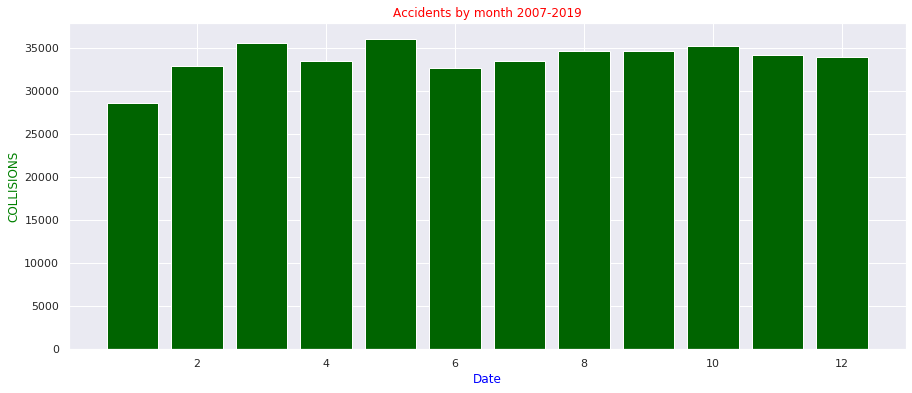

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(by_month['month'], by_month['counts'],color='darkgreen')
plt.title('Accidents by month 2007-2019', color="red")
plt.xlabel('Date',color="blue");
plt.ylabel('COLLISIONS',color="green");

# Accidents by day 2007-2019

In [15]:
accidents['DAY_ACC']=accidents['FECHA_HORA_ACC'].apply(lambda x: x.day_name())
accidents_by_weeday=accidents[['DAY_ACC','CODIGO_ACCIDENTE']].groupby(['DAY_ACC']).count().reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_weeday['DAY_ACC'] = pd.Categorical(accidents_by_weeday['DAY_ACC'], categories=cats, ordered=True)
accidents_by_weeday = accidents_by_weeday.sort_values('DAY_ACC')
accidents_by_weeday

DAY_ACC  CODIGO_ACCIDENTE
1     Monday             54918
5    Tuesday             61871
6  Wednesday             60655
4   Thursday             59431
0     Friday             65187
2   Saturday             62916
3     Sunday             40370

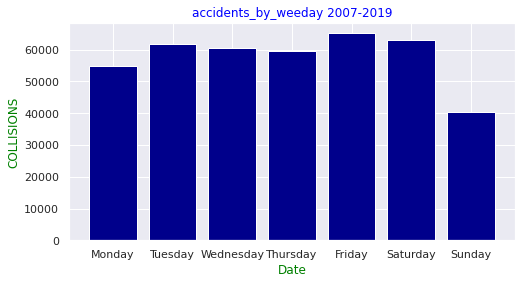

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(accidents_by_weeday['DAY_ACC'], accidents_by_weeday['CODIGO_ACCIDENTE'],color='darkblue')
plt.title('accidents_by_weeday 2007-2019', color="blue")
plt.xlabel('Date',color="green");
plt.ylabel('COLLISIONS',color="green");

# by localidad

In [17]:
accidents_by_LOC=accidents[['LOCALIDAD','CODIGO_ACCIDENTE']].groupby(['LOCALIDAD']).count().reset_index().sort_values(by='CODIGO_ACCIDENTE',ascending=False)
accidents_by_LOC

LOCALIDAD  CODIGO_ACCIDENTE
18             USAQUEN             43738
8              KENNEDY             42410
6             ENGATIVA             41993
14                SUBA             39251
7             FONTIBON             30232
10       PUENTE ARANDA             30015
4            CHAPINERO             29886
16         TEUSAQUILLO             24433
1       BARRIOS UNIDOS             23938
9         LOS MARTIRES             14916
2                 BOSA             13952
13            SANTA FE             12933
5       CIUDAD BOLIVAR             12675
17          TUNJUELITO              9960
11  RAFAEL URIBE URIBE              9730
12       SAN CRISTOBAL              8655
0       ANTONIO NARIÑO              8021
19                USME              6115
3           CANDELARIA              2487
15             SUMAPAZ                 8

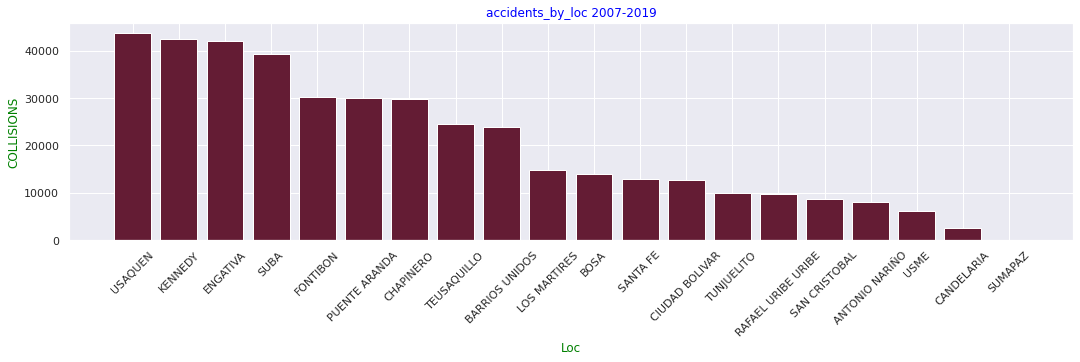

In [18]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_LOC['LOCALIDAD'], accidents_by_LOC['CODIGO_ACCIDENTE'],color='#641c34')
plt.title('accidents_by_loc 2007-2019', color="blue")
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

# by accident type

In [19]:
accidents_by_type=accidents[['CLASE_ACC','CODIGO_ACCIDENTE']].groupby(['CLASE_ACC']).count().sort_values(by='CODIGO_ACCIDENTE',ascending=False).reset_index()
accidents_by_type

CLASE_ACC  CODIGO_ACCIDENTE
0             CHOQUE            338284
1          ATROPELLO             45333
2  CAIDA DE OCUPANTE              8452
3               OTRO              5697
4        VOLCAMIENTO              4824
5         AUTOLESION              2535
6           INCENDIO                40

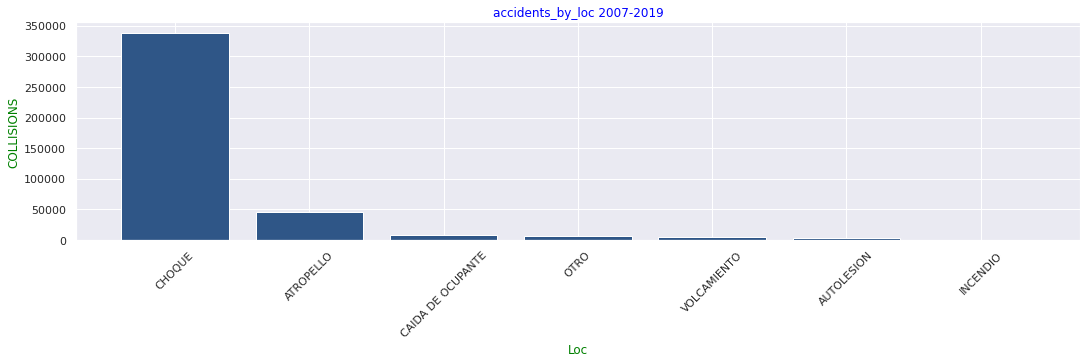

In [20]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_type['CLASE_ACC'], accidents_by_type['CODIGO_ACCIDENTE'],color='#2f5687')
plt.title('accidents_by_loc 2007-2019', color="blue")
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

In [25]:
accidents_by_grav=accidents[['GRAVEDAD','CODIGO_ACCIDENTE']].groupby(['GRAVEDAD']).count().sort_values(by='CODIGO_ACCIDENTE',ascending=False).reset_index()
accidents_by_grav

GRAVEDAD  CODIGO_ACCIDENTE
0   SOLO DANOS            269350
1  CON HERIDOS            130321
2  CON MUERTOS              5674

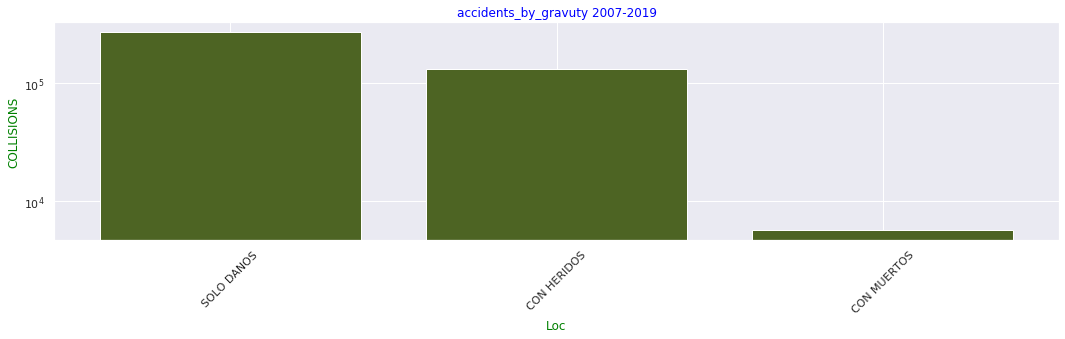

In [26]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_grav['GRAVEDAD'], accidents_by_grav['CODIGO_ACCIDENTE'],color='#4d6423')
plt.title('accidents_by_gravuty 2007-2019', color="blue")
ax.set_yscale('log')
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

# More EDA

# BOGOTA MAP

In [27]:
folium_map = folium.Map(location=[4.624335, -74.063644],
                        zoom_start=13,
                        tiles="OpenStreetMap")
folium_map

In [28]:
folium_map = folium.Map(location=[4.624335, -74.063644],
                        zoom_start=13,
                        tiles="OpenStreetMap")
#Now we can have a scatter plot of the first 1000 data points on the above map
for i in range(0,10000):
    marker = folium.CircleMarker(location=[accidents["Y"][i],accidents["X"][i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)

folium_map